In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import StratifiedKFold


In [27]:
df1 = pd.read_csv('training_set_features.csv')
df2 = pd.read_csv('training_set_labels.csv')

df2


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [28]:
df_merged = df1.merge(df2, on='respondent_id', how='inner')

df_merged.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [73]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_merged):
    # Drop columns: 'respondent_id', 'health_insurance'
    df_merged = df_merged.drop(columns=['respondent_id', 'health_insurance'])
    return df_merged

df_merged_clean = clean_data(df_merged.copy())
df_merged_clean.head()

"""
Cell generated by Data Wrangler.
"""
import pandas as pd

def clean_data(df_merged_clean):
    # One-hot encode columns: 'age_group', 'education' and 10 other columns
    for column in ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']:
        insert_loc = df_merged_clean.columns.get_loc(column)
        df_merged_clean = pd.concat([df_merged_clean.iloc[:,:insert_loc], pd.get_dummies(df_merged_clean.loc[:, [column]], dummy_na=True), df_merged_clean.iloc[:,insert_loc+1:]], axis=1)
    return df_merged_clean

df_merged_clean_1 = clean_data(df_merged_clean.copy())
df_merged_clean_1.head()

"""
Cell generated by Data Wrangler.
"""
def clean_data(df_merged_clean_1):
    # Drop columns: 'age_group_nan', 'age_group_18 - 34 Years' and 22 other columns
    df_merged_clean_1 = df_merged_clean_1.drop(columns=['age_group_nan', 'age_group_18 - 34 Years', 'education_nan', 'education_12 Years', 'race_nan', 'race_Black', 'sex_nan', 'sex_Female', 'income_poverty_nan', 'income_poverty_<= $75,000, Above Poverty', 'marital_status_nan', 'marital_status_Married', 'rent_or_own_nan', 'rent_or_own_Own', 'employment_status_nan', 'employment_status_Employed', 'hhs_geo_region_nan', 'hhs_geo_region_atmpeygn', 'census_msa_nan', 'census_msa_MSA, Not Principle  City', 'employment_industry_nan', 'household_adults', 'employment_occupation_bxpfxfdn', 'employment_occupation_nan'])
    return df_merged_clean_1

df_merged_clean_2 = clean_data(df_merged_clean_1.copy())
df_merged_clean_2.head()

"""
Cell generated by Data Wrangler.
"""
def clean_data(df_merged_clean_2):
    # Drop rows with missing data across all columns
    df_merged_clean_2 = df_merged_clean_2.dropna()
    return df_merged_clean_2

df_merged_clean_3 = clean_data(df_merged_clean_2.copy())
df_merged_clean_3.head()



,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,0,0


In [33]:
Y = df_merged_clean_3[['seasonal_vaccine', 'h1n1_vaccine']]
X = df_merged_clean_3.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)

In [34]:
X.columns = (
    X.columns.astype(str)
    .str.replace('[', '(', regex=False)
    .str.replace(']', ')', regex=False)
    .str.replace('<', 'lt', regex=False)
    .str.replace('>', 'gt', regex=False)
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = MultiOutputClassifier(
        XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss')
    )
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    
    accuracy = np.mean([
        accuracy_score(Y_test.iloc[:, i], Y_pred[:, i]) for i in range(Y.shape[1])
    ])
    f1 = f1_score(Y_test, Y_pred, average='macro')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}")

print(f"\nOverall Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Overall F1-macro: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

Fold 1: Accuracy = 0.810, F1 = 0.675
Fold 2: Accuracy = 0.805, F1 = 0.672
Fold 3: Accuracy = 0.808, F1 = 0.659
Fold 4: Accuracy = 0.805, F1 = 0.670
Fold 5: Accuracy = 0.798, F1 = 0.663

Overall Accuracy: 0.805 ± 0.004
Overall F1-macro: 0.668 ± 0.006


In [ ]:
XGBClassifier(
    tree_method='hist',
    device='cuda',
    random_state=42,
    eval_metric='logloss',
    n_estimators=500,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=3,
    min_child_weight=1
)



param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 3]
}

xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=4,
    n_jobs=-1
)

grid.fit(X, Y['h1n1_vaccine'])
print("Best param: ", grid.best_params_)
print("Best AUC:", grid.best_score_)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Лучшие параметры: {'colsample_bytree': 0.9, 'gamma': 3, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.7}
Лучший AUC: 0.8470897528338014


In [ ]:
X.columns = (
    X.columns.astype(str)
    .str.replace('[', '(', regex=False)
    .str.replace(']', ')', regex=False)
    .str.replace('<', 'lt', regex=False)
    .str.replace('>', 'gt', regex=False)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []

auc_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = MultiOutputClassifier(
        XGBClassifier(
            n_estimators=500,
            max_depth=3,
            learning_rate=0.05,
            subsample=0.7,
            colsample_bytree=0.7,
            gamma=3,
            min_child_weight=1,
            random_state=42,
            eval_metric='logloss',
            tree_method='gpu_hist',
            predictor='gpu_predictor'
        )
    )
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    
    accuracy = np.mean([
        accuracy_score(Y_test.iloc[:, i], Y_pred[:, i]) for i in range(Y.shape[1])
    ])
    f1 = f1_score(Y_test, Y_pred, average='macro')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}")

    Y_pred_proba = np.column_stack([
        est.predict_proba(X_test)[:, 1] for est in model.estimators_
    ])

    auc_h1n1 = roc_auc_score(Y_test.iloc[:, 0], Y_pred_proba[:, 0])
    auc_seasonal = roc_auc_score(Y_test.iloc[:, 1], Y_pred_proba[:, 1])
    auc_mean = np.mean([auc_h1n1, auc_seasonal])

    auc_scores.append(auc_mean)

    print(f"Fold {fold}: AUC_h1n1 = {auc_h1n1:.3f}, AUC_seasonal = {auc_seasonal:.3f}, Mean AUC = {auc_mean:.3f}")

print(f"\nOverall Mean AUC: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA i

Fold 1: Accuracy = 0.820, F1 = 0.683
Fold 1: AUC_h1n1 = 0.867, AUC_seasonal = 0.853, Mean AUC = 0.860


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA i

Fold 2: Accuracy = 0.814, F1 = 0.682
Fold 2: AUC_h1n1 = 0.869, AUC_seasonal = 0.850, Mean AUC = 0.860


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA i

Fold 3: Accuracy = 0.818, F1 = 0.673
Fold 3: AUC_h1n1 = 0.871, AUC_seasonal = 0.850, Mean AUC = 0.860


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA i

Fold 4: Accuracy = 0.813, F1 = 0.676
Fold 4: AUC_h1n1 = 0.866, AUC_seasonal = 0.848, Mean AUC = 0.857


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA i

Fold 5: Accuracy = 0.804, F1 = 0.667
Fold 5: AUC_h1n1 = 0.860, AUC_seasonal = 0.837, Mean AUC = 0.848

Overall Mean AUC: 0.857 ± 0.004


In [37]:
print(f"\nOverall Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Overall F1-macro: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")


Overall Accuracy: 0.814 ± 0.005
Overall F1-macro: 0.676 ± 0.006


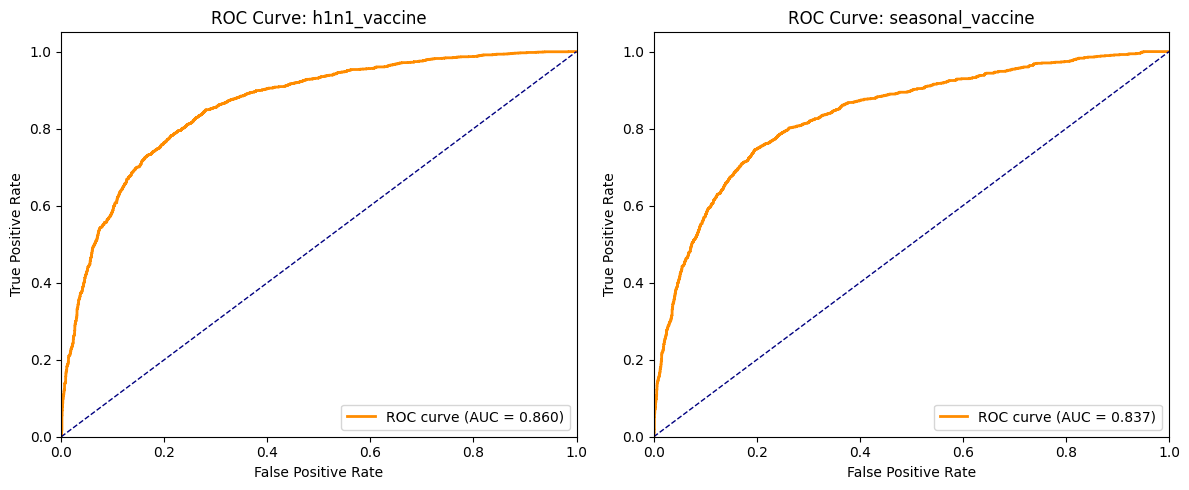

In [ ]:
# === ROC curves ===
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, target in enumerate(['h1n1_vaccine', 'seasonal_vaccine']):
    y_true = Y_test.iloc[:, i]
    y_pred = Y_pred_proba[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    ax[i].plot(fpr, tpr, color='darkorange', lw=2,
               label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax[i].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax[i].set_xlim([0.0, 1.0])
    ax[i].set_ylim([0.0, 1.05])
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title(f'ROC Curve: {target}')
    ax[i].legend(loc="lower right")

plt.tight_layout()
plt.show()


Now only for h1n1

In [65]:
"""For h1n1_vaccine"""
Y = df_merged_clean_3['h1n1_vaccine']
X = df_merged_clean_3.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)


In [ ]:
X.columns = (
    X.columns.astype(str)
    .str.replace('[', '(', regex=False)
    .str.replace(']', ')', regex=False)
    .str.replace('<', 'lt', regex=False)
    .str.replace('>', 'gt', regex=False)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = XGBClassifier(
        random_state=42,
        n_estimators=100,
        eval_metric='logloss',
        use_label_encoder=False 
    )
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}")

print(f"\nOverall Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Overall F1: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:36:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.835, F1 = 0.580
Fold 2: Accuracy = 0.824, F1 = 0.569


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:36:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.827, F1 = 0.543


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.830, F1 = 0.571
Fold 5: Accuracy = 0.823, F1 = 0.564

Overall Accuracy: 0.828 ± 0.005
Overall F1: 0.566 ± 0.012


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
xgb = XGBClassifier(
    tree_method='hist',
    device='cuda',          
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
)

param_grid = {
    'n_estimators': [20, 30, 40, 50],
    'learning_rate': [0.03, 0.05],
    'max_depth': [3, 5],
}



grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=4,
    n_jobs=-1,
)

grid.fit(X, Y)

print("Best param: ", grid.best_params_)
print("Best AUC:", grid.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best param:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best AUC: 0.8404665656777063


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:37:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
target = 'h1n1_vaccine'
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores, f1_scores, auc_scores = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, Y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = XGBClassifier(
        n_estimators=50,
        max_depth=5,
        learning_rate=0.05,
        random_state=42,
        eval_metric='logloss',
        tree_method='hist',
        device='cuda',
        use_label_encoder=False
    )

    model.fit(
        X_train, Y_train,
        eval_set=[(X_test, Y_test)],
        verbose=False
    )

    Y_pred = model.predict(X_test)
    Y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred_proba)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f"Fold {fold}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}, AUC = {auc:.3f}")

print(f"\nOverall Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Overall F1: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
print(f"Overall AUC: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.825, F1 = 0.524, AUC = 0.843


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.825, F1 = 0.528, AUC = 0.827


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.825, F1 = 0.518, AUC = 0.840


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.838, F1 = 0.544, AUC = 0.844


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.835, F1 = 0.553, AUC = 0.853

Overall Accuracy: 0.830 ± 0.006
Overall F1: 0.533 ± 0.013
Overall AUC: 0.842 ± 0.008


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:41:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


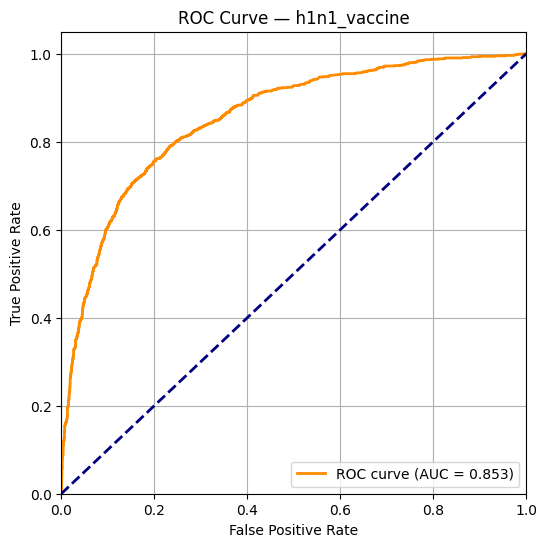

In [ ]:
model.fit(X_train, Y_train)
Y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — h1n1_vaccine")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Now for seasonal vaccine

In [68]:
"""For h1n1_vaccine"""
Y = df_merged_clean_3['seasonal_vaccine']
X = df_merged_clean_3.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)


In [ ]:
X.columns = (
    X.columns.astype(str)
    .str.replace('[', '(', regex=False)
    .str.replace(']', ')', regex=False)
    .str.replace('<', 'lt', regex=False)
    .str.replace('>', 'gt', regex=False)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores, f1_scores = [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = XGBClassifier(
        random_state=42,
        n_estimators=100,
        eval_metric='logloss',
        use_label_encoder=False 
    )
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}")

print(f"\nOverall Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Overall F1: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.784, F1 = 0.771


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.786, F1 = 0.775


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.789, F1 = 0.775


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.780, F1 = 0.769
Fold 5: Accuracy = 0.773, F1 = 0.762

Overall Accuracy: 0.782 ± 0.005
Overall F1: 0.770 ± 0.005


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
xgb = XGBClassifier(
    tree_method='hist',
    device='cuda',          
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
)

param_grid = {
    'n_estimators': [20, 30, 40, 50],
    'learning_rate': [0.03, 0.05],
    'max_depth': [3, 5],
}



grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=4,
    n_jobs=-1,
)

grid.fit(X, Y)

print("Best param: ", grid.best_params_)
print("Best AUC:", grid.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best param:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best AUC: 0.8582169033097081


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
target = 'h1n1_vaccine'
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores, f1_scores, auc_scores = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, Y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = XGBClassifier(
        n_estimators=50,
        max_depth=5,
        learning_rate=0.05,
        random_state=42,
        eval_metric='logloss',
        tree_method='hist',
        device='cuda',
        use_label_encoder=False
    )

    model.fit(
        X_train, Y_train,
        eval_set=[(X_test, Y_test)],
        verbose=False
    )

    Y_pred = model.predict(X_test)
    Y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred_proba)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f"Fold {fold}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}, AUC = {auc:.3f}")

print(f"\nOverall Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Overall F1: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
print(f"Overall AUC: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.777, F1 = 0.763, AUC = 0.858


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.788, F1 = 0.773, AUC = 0.865


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.777, F1 = 0.762, AUC = 0.850


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.780, F1 = 0.762, AUC = 0.857


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.787, F1 = 0.775, AUC = 0.861

Overall Accuracy: 0.782 ± 0.005
Overall F1: 0.767 ± 0.006
Overall AUC: 0.858 ± 0.005


c:\Users\Griga\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:45:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


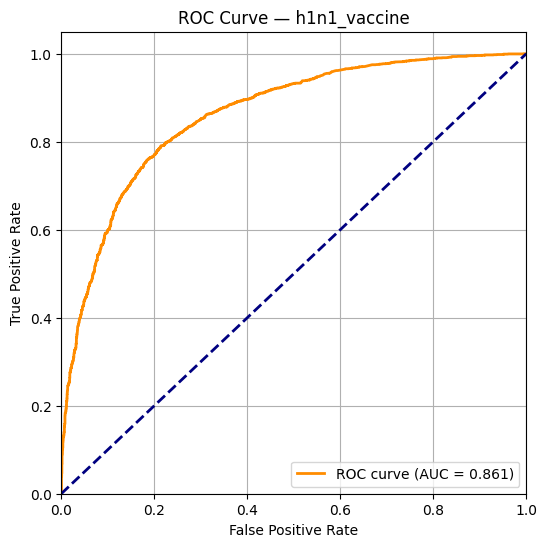

In [ ]:
model.fit(X_train, Y_train)
Y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — h1n1_vaccine")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
